<h1><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h1>

Before submitting, **please**, make sure that your notebook runs **without errors** in Python 3.6
and **reproduces your solution as intended**, when you **Restart the Kernel and re-run the whole
notebook**!
<span style="color:red;">You will be severely penalized if you notebook does not run.</span>

Whereever applicable your solution will be graded based on the **plots**, generated by
**your code** on **TA's** computer.

<br/> <!--Intentionally left blank-->

# Home Assignment -- 5

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

<br/> <!--Intentionally left blank-->

<hr/> <!--Intentionally left blank-->

# Part 1 (19 pt.): Model selection and sensitivity analysis

<br/> <!--Intentionally left blank-->

## Task 1 (2 pt.): Information criteria

Assume that regression model is
$$y = \sum_{i=1}^k \beta_i x_i + \varepsilon,$$
and $\varepsilon$ is dictributed as normally: $\varepsilon \sim \mathcal{N}(0, \sigma^2)$, $\sigma^2$ is known.

Prove that the model with highest Akaike information criterion is the model with smallest Mallow's $C_p$.

**BEGIN Solution**

Suppose model $J$ has the highest AIC-score, i.e.
$$
\forall \tilde{J} \quad L_J - \vert J \vert \geq \quad L_\tilde{J} - \vert \tilde{J} \vert.
$$

In case of gaussian white noise log-likelihood can be written explicitly and the constant in log-likelihood will cancel:
\begin{align*}
&-\frac{1}{2\sigma^2}m\tilde{R}_{tr}(J) - \vert J \vert \geq -\frac{1}{2\sigma^2}m\tilde{R}_{tr}(\tilde{J}) - \vert \tilde{J} \vert, \\
&\tilde{R}_{tr}(J) + \frac{2\sigma^2}{m}\vert J \vert \leq \tilde{R}_{tr}(\tilde{J}) + \frac{2\sigma^2}{m}\vert \tilde{J} \vert,
\end{align*}
so model $J$ also has the smallest $C_p$. We can do the same in the opposite direction to show that model with the smallest $C_p$ has the highest AIC.

**END Solution**

<br/> <!--Intentionally left blank-->

## Task 2 (17 pt.): Sensitivity analysis and optimization for rotating disk problem

In this tsk, you are proposed to solve a problem of optimization of a rotating disc. You will use approximation techniques, sensitivity analysis and optimization. For sensitivity analysis you are recommended to use SALib library (https://github.com/SALib/SALib), and scipy for optimization.

1. Parameters `r1,t1,r2,r3,t3,r4` are input variables that define a geometrical shape of a disk. Parameters `mass,smax,u2` are mass of a disk, maximal radial stress, and contact stress, respectively. **Those are the
target variables to predict (yes there are three regression targets).**
2. The `problem` Pythonic dict is used for SALib methods and defines bounds for parameters.

### Necessary imports

Run the following command in the next empty code cell.

```python
!pip install salib
```

In [1]:
### here

Other imports

In [2]:
%matplotlib inline
from SALib.analyze import sobol as sobol_analyzer
from SALib.analyze import morris as morris_analyzer

from SALib.sample import saltelli as saltelli_sampler
from SALib.sample import morris as morris_sampler

from scipy.optimize import minimize

import numpy as np
import pandas as pd

from matplotlib import pyplot

from sklearn.model_selection import GridSearchCV

### Define problem

Problem is defined as a simple Pythonic dict, where you should number of input variables,
bounds for each input variable and their names. This will be helpful for sensitivity analysis.
Note, that bounds defined here are true for **standardized data**.

In [3]:
# NAME ERROR: data is not defined so I placed it in the next section
'''
problem = {
    'num_vars': 6,
    'names': data.columns.values[:6],
    'bounds': np.array([[-1.7321, 1.7321],
                        [-1.7321, 1.7321],
                        [-1.7321, 1.7321],
                        [-1.7321, 1.7321],
                        [-1.7321, 1.7321],
                        [-1.7321, 1.7321]]),
    'groups': None
    }'''

"\nproblem = {\n    'num_vars': 6,\n    'names': data.columns.values[:6],\n    'bounds': np.array([[-1.7321, 1.7321],\n                        [-1.7321, 1.7321],\n                        [-1.7321, 1.7321],\n                        [-1.7321, 1.7321],\n                        [-1.7321, 1.7321],\n                        [-1.7321, 1.7321]]),\n    'groups': None\n    }"

<br/> <!--Intentionally left blank-->

### Task 2.1 (7 pt.): Surrogate modelling

The actual dependency is not given, only a data set of inputs and outputs.
Surrogate modelling is an approach that allows to construct approximations of the real dependecy, and use them for optimization and modelling.
To perform sensitivity analysis and optimization we are going to use a regression model.

Your tasks:

* Load the data set from `data/doe_100.csv`.
* Build several regression models using different techniques: Gaussian Process Regression, Kernel Ridge regression, SVR.
* Perform k-fold cross-validation for each model and choose the best.

The most accurate models will be used in **all subsequent excersices**.

<span style="color:green">**NOTE**</span> sklearn has a convenient GP implementation.

```python
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import My, Favourite, Kernels, ...
```

In [4]:
### BEGIN Solution
data = pd.read_csv("./data/doe_100.csv")
data.head()# to check that load is successful

,r1,t1,r2,r3,t3,r4,mass,smax,u2
0,15.5,14.35,128.3,158.91,38.73,175.85,19.982671,612.495001,0.263909
1,38.5,18.95,130.5,162.33,39.19,173.15,20.789654,521.170324,0.259584
2,37.5,21.71,135.5,157.47,24.47,177.35,18.368221,478.518975,0.261298
3,94.5,4.69,124.1,158.01,31.37,171.95,15.231998,696.595847,0.496860
4,42.5,34.13,134.7,153.15,43.33,179.15,26.027566,378.288171,0.207129


In [5]:
#Problem definition from the previous section
problem = {
    'num_vars': 6,
    'names': data.columns.values[:6],
    'bounds': np.array([[-1.7321, 1.7321],
                        [-1.7321, 1.7321],
                        [-1.7321, 1.7321],
                        [-1.7321, 1.7321],
                        [-1.7321, 1.7321],
                        [-1.7321, 1.7321]]),
    'groups': None
    }


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, Matern
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [32]:
X=pd.DataFrame.as_matrix(data)[:,:6]
y=pd.DataFrame.as_matrix(data)[:,6:]

X= X - np.mean(X,axis=0)#center
X = X * 1/np.std(X,axis=0)#standardize

y=y-np.mean(y,axis=0)
y=y * 1/np.std(y,axis=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

[0.19700187 0.21203606 0.21625689 0.18073729 0.152118   0.29150075
 0.20086633 0.16543186 0.15471368 0.24166779 0.15174538 0.28725403
 0.19570054 0.17264524 0.29076533 0.21445461 0.20122971 0.27206262
 0.20492694 0.13701543 0.17835012 0.16750056 0.1823425  0.15729775
 0.24896867 0.11556087 0.32172639 0.51365356 0.16268885 0.16347793]


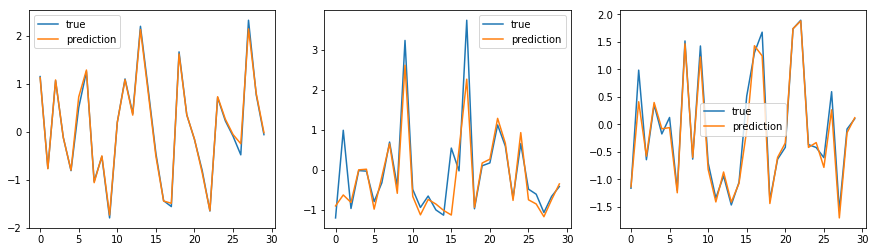

In [33]:
#GaussianProcess

gpKer =  ConstantKernel()*Matern()
gp = GaussianProcessRegressor(kernel=gpKer,n_restarts_optimizer=50)
gp = gp.fit(X_train,y_train
           )
gp.score(X_test,y_test)
y_gpr, y_std = gp.predict(X_test, return_std=True)

print(y_std)

(f,(ax1,ax2,ax3))=plt.subplots(1,3,figsize=(15,4))

ax1.plot(y_test[:,0])
ax1.plot(gp.predict(X_test)[:,0])
ax1.legend(["true","prediction"])

ax2.plot(y_test[:,1])
ax2.plot(gp.predict(X_test)[:,1])
ax2.legend(["true","prediction"])

ax3.plot(y_test[:,2])
ax3.plot(gp.predict(X_test)[:,2])
ax3.legend(["true","prediction"])

<br/> <!--Intentionally left blank-->

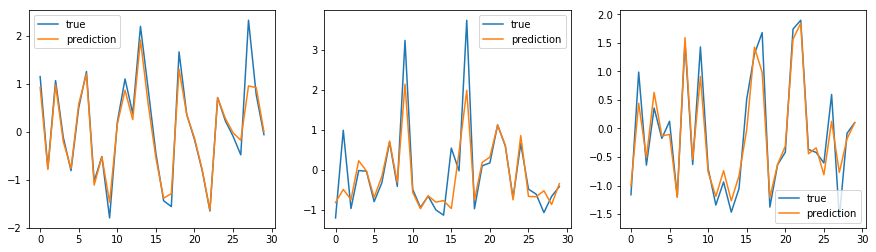

In [34]:
#KernelRidge

kerRidge =  GridSearchCV(KernelRidge(kernel='rbf'), cv=15,
                  param_grid={"alpha": np.linspace(1e-3,1,20),"gamma": np.linspace(0.1,5,40)})

kerRidge.fit(X_train,y_train)

(f,(ax1,ax2,ax3))=plt.subplots(1,3,figsize=(15,4))

ax1.plot(y_test[:,0])
ax1.plot(kerRidge.predict(X_test)[:,0])
ax1.legend(["true","prediction"])

ax2.plot(y_test[:,1])
ax2.plot(kerRidge.predict(X_test)[:,1])
ax2.legend(["true","prediction"])

ax3.plot(y_test[:,2])
ax3.plot(kerRidge.predict(X_test)[:,2])
ax3.legend(["true","prediction"])


CV-Scores(R^2)
0: 0.9227437853004425 +- 0.058911750221813886
1: 0.6292730231548991 +- 0.25472530643237684
2: 0.7997261948526252 +- 0.1560060898653045


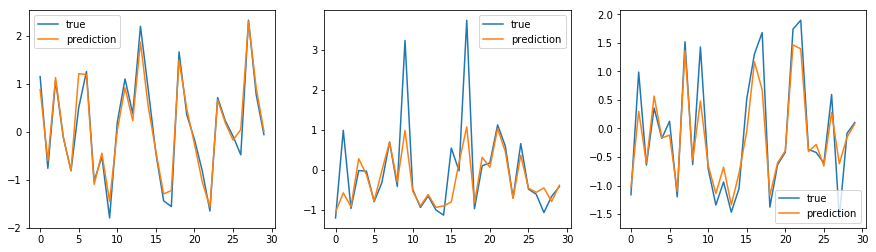

In [44]:
#SVR

svr0 =  GridSearchCV(SVR(kernel='linear'), cv=15,
                  param_grid={"C": np.linspace(0.001,1,15)})
svr1 =  GridSearchCV(SVR(kernel="rbf"), cv=15,
                  param_grid={"C": np.linspace(0.001,1,15),"gamma":np.linspace(0.1,1,10)})
svr2 =  GridSearchCV(SVR(kernel='rbf'), cv=15,
                  param_grid={"C": np.linspace(0.001,1,15),"gamma":np.linspace(0.1,1,10)})

svr0=svr0.fit(X_train,y_train[:,0])
svr1=svr1.fit(X_train,y_train[:,1])
svr2=svr2.fit(X_train,y_train[:,2])

print("CV-Scores(R^2)")
print("0:",svr0.cv_results_["mean_test_score"][svr0.best_index_], "+- "+str(svr0.cv_results_["std_test_score"][svr0.best_index_]) )
print("1:",svr1.cv_results_["mean_test_score"][svr1.best_index_], "+- "+str(svr1.cv_results_["std_test_score"][svr1.best_index_]) )
print("2:",svr2.cv_results_["mean_test_score"][svr2.best_index_], "+- "+str(svr2.cv_results_["std_test_score"][svr2.best_index_]) )

(f,(ax1,ax2,ax3))=plt.subplots(1,3,figsize=(15,4))

ax1.plot(y_test[:,0])
ax1.plot(svr0.predict(X_test))
ax1.legend(["true","prediction"])

ax2.plot(y_test[:,1])
ax2.plot(svr1.predict(X_test))
ax2.legend(["true","prediction"])

ax3.plot(y_test[:,2])
ax3.plot(svr2.predict(X_test))
ax3.legend(["true","prediction"])

### END Solution

### Task 2.2 (6 pt.): Sensitivity analysis

SALib is a python library for sensitivity analysis.

It implements some popular global sensitivity analysis methods: 
* Morris method - that may be thought of as crude estimation of average absolute value of partial derivative. 
* Sobol indicies - that show portion of variance in the output that is explained by input.

Each method takes **x** and **y** samples as input. But the samples must be properly generated.
There are special functions in SALib library to do exactly that.

Using the **best model per target** your task is to

* calculate Sobol indices:
    * Generate **x** and **y** samples using Saltelli’s extension of the Sobol sequence
    * Calculate Sobol indices using obtained samples
* calculate screening indices
    * Generate **x** and **y** samples for Morris method
    * Apply Morris method to generated samples to obtain screening indices


* Using your judgement and based on the analysis results choose variables have the most influence on the output.

**NOTE** Make sure to use the *same sample* for all three targets.

In [60]:
### BEGIN Solution

paramValuesSaltelli = saltelli_sampler.sample(problem, 3000)

y_gpSal = gp.predict(paramValuesSaltelli)
y_kerRidgeSal = kerRidge.predict(paramValuesSaltelli)
y_svrSal = np.array([svr0.predict(paramValuesSaltelli),svr1.predict(paramValuesSaltelli),svr2.predict(paramValuesSaltelli)]).T

Si_gpSal = [sobol_analyzer.analyze(problem,y_gpSal[:,0]),sobol_analyzer.analyze(problem,y_gpSal[:,1]),sobol_analyzer.analyze(problem,y_gpSal[:,2])]
Si_kerRidgeSal = [sobol_analyzer.analyze(problem,y_kerRidgeSal[:,0]),sobol_analyzer.analyze(problem,y_kerRidgeSal[:,1]),sobol_analyzer.analyze(problem,y_kerRidgeSal[:,2])]
Si_svrSal = [sobol_analyzer.analyze(problem,y_svrSal[:,0]),sobol_analyzer.analyze(problem,y_svrSal[:,1]),sobol_analyzer.analyze(problem,y_svrSal[:,2])]
# >>> your solution here <<<

### END Solution

<br/> <!--Intentionally left blank-->
For Gaussian process regression features are mostly non-influential in the first order, except t1 for predicting target1. According to total indices, feature t1 heavily influences all targets, for target0 feature t3 is also important.

In [59]:
print(data.columns)
print("GP, predicting target0",Si_gpSal[0])
print("GP, predicting target1",Si_gpSal[1])
print("GP, predicting target2",Si_gpSal[2])

Index(['r1', 't1', 'r2', 'r3', 't3', 'r4', 'mass', 'smax', 'u2'], dtype='object')
GP, predicting target0 {'S1': array([7.56402498e-02, 4.09428030e-01, 5.76760730e-04, 4.13532088e-04,
       4.94380740e-01, 7.75247362e-04]), 'S1_conf': array([0.01425853, 0.03024181, 0.00218129, 0.00269429, 0.03117217,
       0.0038271 ]), 'ST': array([0.08719773, 0.42418143, 0.00199394, 0.00251519, 0.50067807,
       0.00509721]), 'ST_conf': array([0.00560692, 0.02468603, 0.00017027, 0.0002414 , 0.02271817,
       0.00042066]), 'S2': array([[        nan,  0.01072183, -0.00290781, -0.00252455, -0.00248289,
        -0.00276181],
       [        nan,         nan, -0.00211976, -0.00072217, -0.00151993,
        -0.00230766],
       [        nan,         nan,         nan, -0.00032434,  0.0003904 ,
        -0.00039658],
       [        nan,         nan,         nan,         nan,  0.00021935,
        -0.00066944],
       [        nan,         nan,         nan,         nan,         nan,
         0.00403426],
   

Feature t1 is also influential in KernelRidge models. For these ones r4 became more importatnt for predicting target0.

In [61]:
print(data.columns)
print("KR, predicting target0",Si_kerRidgeSal[0])
print("KR, predicting target1",Si_kerRidgeSal[1])
print("KR, predicting target2",Si_kerRidgeSal[2])

Index(['r1', 't1', 'r2', 'r3', 't3', 'r4', 'mass', 'smax', 'u2'], dtype='object')
KR, predicting target0 {'S1': array([0.08078625, 0.37662499, 0.00319396, 0.00137652, 0.49613263,
       0.00426275]), 'S1_conf': array([0.01655738, 0.02735178, 0.00541928, 0.005467  , 0.02982811,
       0.00576346]), 'ST': array([0.09517531, 0.40187265, 0.01153166, 0.01069529, 0.51655509,
       0.01442104]), 'ST_conf': array([0.00614258, 0.0223785 , 0.00085109, 0.00096334, 0.02445875,
       0.00094836]), 'S2': array([[        nan,  0.00829973, -0.00360988, -0.00261174, -0.00337888,
        -0.00409624],
       [        nan,         nan, -0.00345089,  0.00068093,  0.0007645 ,
        -0.00182577],
       [        nan,         nan,         nan, -0.00074517,  0.00111241,
        -0.00219035],
       [        nan,         nan,         nan,         nan, -0.0007085 ,
        -0.00151184],
       [        nan,         nan,         nan,         nan,         nan,
         0.00592414],
       [        nan,       

As to SVR, there is no crucially important features except t1 for predicting target1 and t1,r1 for prediction of target2.

In [63]:
print(data.columns)
print("SVR, predicting target0",Si_svrSal[0])
print("SVR, predicting target1",Si_svrSal[1])
print("SVR, predicting target2",Si_svrSal[2])

Index(['r1', 't1', 'r2', 'r3', 't3', 'r4', 'mass', 'smax', 'u2'], dtype='object')
SVR, predicting target0 {'S1': array([5.34865967e-02, 4.45560303e-01, 4.94962156e-04, 6.27497823e-04,
       4.98526548e-01, 2.37105372e-03]), 'S1_conf': array([0.01066329, 0.02847158, 0.00118215, 0.00131947, 0.03695496,
       0.00256542]), 'ST': array([5.31612731e-02, 4.44779145e-01, 4.74094156e-04, 6.20739168e-04,
       4.97651405e-01, 2.41601246e-03]), 'ST_conf': array([2.69712041e-03, 1.94234602e-02, 2.51552908e-05, 2.94225700e-05,
       2.40675871e-02, 1.41453782e-04]), 'S2': array([[            nan, -6.88253105e-04, -1.25364668e-03,
        -1.26143165e-03, -1.14137798e-03, -1.28294821e-03],
       [            nan,             nan, -1.62946897e-03,
        -1.65911372e-03, -2.22972600e-03, -1.70967872e-03],
       [            nan,             nan,             nan,
        -5.99225454e-05, -1.05524037e-04, -5.95639995e-05],
       [            nan,             nan,             nan,
             

In [66]:
#Now to Morris
# Generate samples
paramValuesMorris = morris_sampler.sample(problem, N=3000, num_levels=4, grid_jump=2, optimal_trajectories=None)

y_gpMor = gp.predict(paramValuesMorris)
y_kerRidgeMor = kerRidge.predict(paramValuesMorris)
y_svrMor = np.array([svr0.predict(paramValuesMorris),svr1.predict(paramValuesMorris),svr2.predict(paramValuesMorris)]).T


print("GP, three targets")
Si_gpMor = [morris_analyzer.analyze(problem,paramValuesMorris,y_gpMor[:,0],conf_level=0.95, 
                    print_to_console=True,
num_levels=4, grid_jump=2, num_resamples=100),
             morris_analyzer.analyze(problem,paramValuesMorris,y_gpMor[:,1],conf_level=0.95, 
                    print_to_console=True,
num_levels=4, grid_jump=2, num_resamples=100),
             morris_analyzer.analyze(problem,paramValuesMorris,y_gpMor[:,2],conf_level=0.95, 
                    print_to_console=True,
num_levels=4, grid_jump=2, num_resamples=100)]


print("KR, three targets")
Si_krMor = [morris_analyzer.analyze(problem,paramValuesMorris,y_kerRidgeMor[:,0],conf_level=0.95, 
                    print_to_console=True,
num_levels=4, grid_jump=2, num_resamples=100),
             morris_analyzer.analyze(problem,paramValuesMorris,y_kerRidgeMor[:,1],conf_level=0.95, 
                    print_to_console=True,
num_levels=4, grid_jump=2, num_resamples=100),
             morris_analyzer.analyze(problem,paramValuesMorris,y_kerRidgeMor[:,2],conf_level=0.95, 
                    print_to_console=True,
num_levels=4, grid_jump=2, num_resamples=100)]


print("SVR, three targets")
Si_svrMor = [morris_analyzer.analyze(problem,paramValuesMorris,y_svrMor[:,0],conf_level=0.95, 
                    print_to_console=True,
num_levels=4, grid_jump=2, num_resamples=100),
             morris_analyzer.analyze(problem,paramValuesMorris,y_svrMor[:,1],conf_level=0.95, 
                    print_to_console=True,
num_levels=4, grid_jump=2, num_resamples=100),
             morris_analyzer.analyze(problem,paramValuesMorris,y_svrMor[:,2],conf_level=0.95, 
                    print_to_console=True,
num_levels=4, grid_jump=2, num_resamples=100)]


GP, three targets
Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
r1                                  0.885     -0.885           0.017      0.463
t1                                  2.067      2.067           0.017      0.483
r2                                  0.150     -0.003           0.004      0.181
r3                                  0.166      0.041           0.004      0.200
t3                                  2.335      2.335           0.010      0.288
r4                                  0.232     -0.128           0.005      0.247
Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
r1                                  0.665     -0.046           0.016      0.816
t1                                  2.923     -2.923           0.049      1.259
r2                                  0.479     -0.242           0.014      0.547
r3                                  0.344      0.265           0.010      0.374
t3                    

As we can see, Morris's method also marks t1 as key feature almost everywhere. It also says that in many algorithms r1 and t3 are crucially importatnt, too.

### Task 2.3 (4 pt.): Optimization

The final goal is to optimize the **mass** of the rotating disk. It will be done with scipy optimizer via approximation, provided by the surrogate model. We assume that surrogate model is of reasonable quality. The optimization problem for full parameter space is prepared for you.

The following optimization problem should be solved:

$$
{\rm mass} \rightarrow \min_x \\
\mbox{subject to} \quad S_{max}(x) \le 600 \\
\qquad \qquad U_2(x) \le 0.3
$$

Your tasks:

* Perform optimization by running the code below
* After performing sensitivity analysis you got the most influential features. Reestimate your models on the reduced feature space
* Change the optimization problem statement so that it usess only the selected variables
* Compare the optimal results for two formulations considered and make a conclusion

In [ ]:
result = minimize(lambda x: best_models[0].predict(x.reshape(1, -1)),
                  [109.0, 32.0, 123.0, 154.0, 6.0, 198.0],
                  bounds=problem['bounds'],
                  constraints=[{'type': 'ineq',
                                'fun' : lambda x: 600 - best_models[1].predict(x.reshape(1, -1))
                               },
                               {'type': 'ineq',
                                'fun' : lambda x: 0.3 - best_models[2].predict(x.reshape(1, -1))
                               }])
print(result)

In [ ]:
### BEGIN Solution

# >>> your solution here <<<

### END Solution

<br/> <!--Intentionally left blank-->